# Heatmap/Hittable over Latitudes from Ferrybox

In this notebook, we 

1. Load ferrybox data from a single journey from the MS Color Fantasy
2. Create latitude grid in the Oslofjord
3. Map cholorphyll measurements from the ferrybox into the target grid

We do this for a single journey.

## Preliminaries

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Load Data, Define Oslofjord Grid, Populate the Hittable

In [3]:
# setup target coords
lat_lo = 59.4
lat_hi = 59.95
lat_range = np.mgrid[lat_lo:lat_hi:32j]

In [4]:
# load ferrybox trajectories
def _load_trajectories(date='2024-06-02'):
    url = "https://thredds.niva.no/thredds/dodsC/datasets/nrt/color_fantasy.nc"
    ds = xr.open_dataset(url, engine='netcdf4')
    # tlo = '2024-06-01T1200'
    # thi = '2024-06-02T1200'
    tlo = "%sT0000" % date
    thi = "%sT2359" % date
    ds = ds.sel(time=slice(tlo, thi))
    return ds.latitude.values, ds.chlorophyll.values
    
lats, chl = _load_trajectories()

In [5]:
def _map_measurements(source_coords, source_measurements, target_coords):
    # target_measurements = len(target_coords) * [ [ ] ]  # DON'T DO THIS, cf. https://stackoverflow.com/q/41770791/21124232
    target_measurements = [[] for _ in range(len(target_coords))]
    for kk in range(len(source_coords)):
        source_coord = source_coords[kk]
        source_measurement = source_measurements[kk]
        idx = np.argmin(np.abs(target_coords - source_coord))
        target_measurements[idx].append(source_measurement)
    return target_measurements
    
chl_on_lat_range = _map_measurements(lats, chl, lat_range)
chl_on_lat_range = [ np.mean(x) for x in chl_on_lat_range ]  # average

/Users/volkerh/miniforge3/envs/iliad/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/volkerh/miniforge3/envs/iliad/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Show Results

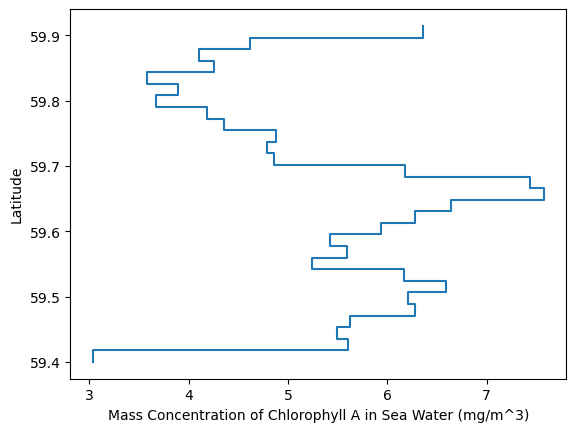

In [6]:
plt.step(chl_on_lat_range, lat_range)
plt.ylabel('Latitude')
plt.xlabel('Mass Concentration of Chlorophyll A in Sea Water (mg/m^3)')
pass